# Import Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import accuracy_score, auc, f1_score, precision_score, recall_score, roc_curve, confusion_matrix
import tensorflow as tf
from keras import models, layers, optimizers, regularizers,metrics

# Prepare Data

## Import Data

In [16]:
X = pd.read_csv('../input/ml-project-arvin/X.csv')
X = X.set_index('ID')
y = pd.read_csv('../input/ml-project-arvin/y.csv')
y = y.set_index('ID')

In [17]:
y = pd.get_dummies(y)
y

,outcome_alive,outcome_dead,outcome_hospitalized,outcome_recovered,outcome_stable,outcome_under treatment
ID,,,,,,
000-1-1,0,0,0,0,0,1
000-1-10,0,1,0,0,0,0
000-1-100,0,0,0,1,0,0
000-1-101,0,0,0,1,0,0
000-1-102,0,0,0,1,0,0
...,...,...,...,...,...,...
005-6014,0,1,0,0,0,0
005-809,0,1,0,0,0,0
005-82,0,1,0,0,0,0


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=15, stratify=y)

In [19]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.transform(X_test)

In [20]:
normalizer = Normalizer()
X_train = normalizer.fit_transform(X_train, y_train)
X_test = normalizer.transform(X_test)

# Feed Forward Model

## Create Feed Forward Network

In [21]:

model = models.Sequential()

model.add(layers.Flatten())
model.add(layers.Dense(units=2048, activation='relu'))
model.add(layers.Dense(units=2048, activation='relu'))
model.add(layers.Dense(units=2048, activation='relu'))
model.add(layers.Dense(units=2048, activation='relu'))
model.add(layers.Dense(units=2048, activation='relu'))
model.add(layers.Dense(units=6, activation='softmax'))


model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

## Training 

In [22]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
395/395 [==============================] - 2s 5ms/step - loss: 0.5082 - accuracy: 0.8270
Epoch 2/100
395/395 [==============================] - 2s 4ms/step - loss: 0.3373 - accuracy: 0.8793
Epoch 3/100
395/395 [==============================] - 2s 4ms/step - loss: 0.3049 - accuracy: 0.8892
Epoch 4/100
395/395 [==============================] - 2s 4ms/step - loss: 0.3231 - accuracy: 0.8835
Epoch 5/100
395/395 [==============================] - 2s 4ms/step - loss: 0.2597 - accuracy: 0.9019
Epoch 6/100
395/395 [==============================] - 2s 4ms/step - loss: 0.2653 - accuracy: 0.9002
Epoch 7/100
395/395 [==============================] - 2s 4ms/step - loss: 0.2490 - accuracy: 0.9036
Epoch 8/100
395/395 [==============================] - 2s 4ms/step - loss: 0.2583 - accuracy: 0.9012
Epoch 9/100
395/395 [==============================] - 2s 4ms/step - loss: 0.2740 - accuracy: 0.9009
Epoch 10/100
395/395 [==============================] - 2s 4ms/step - loss: 0.2502 - accura

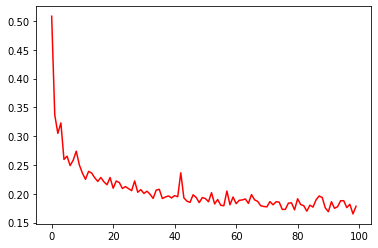

In [28]:
losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

## Get Predictions On Sets

In [29]:
ff_pred_train = model.predict(X_train)

ff_pred_test = model.predict(X_test)

In [30]:
pd_y_train = pd.DataFrame(y_train, columns=y.columns)
pd_y_test = pd.DataFrame(y_test, columns=y.columns)
pd_pred_train = pd.DataFrame(ff_pred_train, columns=y.columns)
pd_pred_test = pd.DataFrame(ff_pred_test, columns=y.columns)

In [31]:
pd_y_train = pd_y_train.idxmax(axis=1)
pd_y_test = pd_y_test.idxmax(axis=1)
pd_pred_train = pd_pred_train.idxmax(axis=1)
pd_pred_test = pd_pred_test.idxmax(axis=1)

# Scoring

In [35]:
scores = []
accuracy_train = accuracy_score(pd_y_train, pd_pred_train)
accuracy_test = accuracy_score(pd_y_test, pd_pred_test)

f1_train = f1_score(pd_y_train, pd_pred_train, average='weighted')
f1_test = f1_score(pd_y_test, pd_pred_test, average='weighted')

precision_train = precision_score(pd_y_train, pd_pred_train, average='weighted')
precision_test = precision_score(pd_y_test, pd_pred_test, average='weighted')

recall_train = recall_score(pd_y_train, pd_pred_train, average='weighted')
recall_test = recall_score(pd_y_test, pd_pred_test, average='weighted')

scores.append(['Feed Forward', accuracy_train, accuracy_test,
        f1_train, f1_test, precision_train, precision_test, recall_train, recall_test])

In [36]:
scores_df = pd.DataFrame(scores, columns = ['model', 'accuracy_train', 'accuracy_test', 'f1_train', 'f1_test', 'precision_train', 'precision_test', 'recall_train', 'recall_test'])
scores_df

,model,accuracy_train,accuracy_test,f1_train,f1_test,precision_train,precision_test,recall_train,recall_test
0,Feed Forward,0.929431,0.920811,0.928794,0.920303,0.936153,0.926805,0.929431,0.920811
